In [11]:
import itertools
import networkx as nx
import matplotlib

In [3]:
timeseries = [2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3]

In [4]:
G = nx.path_graph(len(timeseries), create_using=nx.DiGraph())

In [5]:
dict(enumerate(timeseries))

{0: 2, 1: 1, 2: 3, 3: 2, 4: 1, 5: 3, 6: 2, 7: 1, 8: 3, 9: 2, 10: 1, 11: 3}

In [8]:
l=0

In [9]:
nx.set_node_attributes(G, dict(enumerate(timeseries)), "value")

# Check all combinations of nodes n series
for (x1, y1), (x2, y2) in itertools.combinations(enumerate(timeseries), 2):
    obstructed = any(
        (y >= max(x1, y2)) and (x-x1 <= l)
        for x, y in enumerate(timeseries[x1 + 1 : x2], start=x1 + 1)
    )

    if not obstructed:
        G.add_edge(x1, x2)

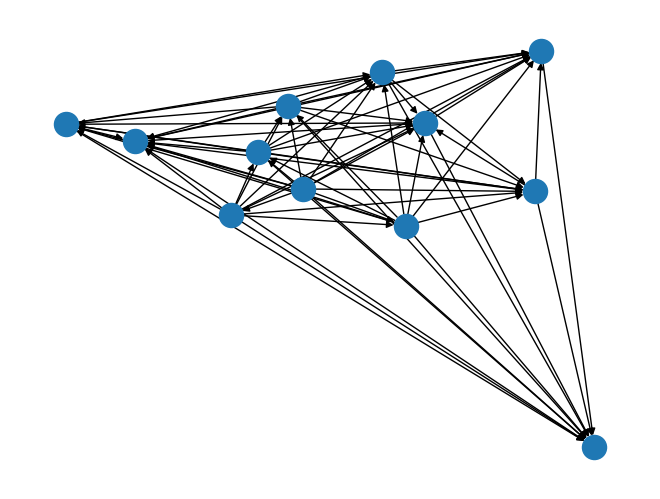

In [12]:
nx.draw(G)

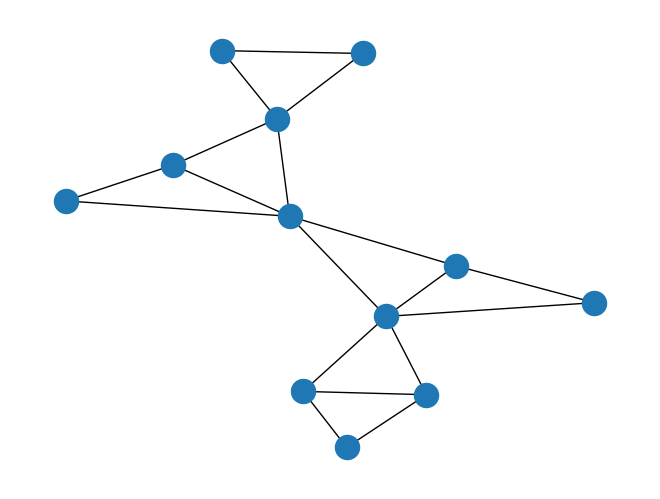

In [14]:
G = nx.path_graph(len(timeseries))
nx.set_node_attributes(G, dict(enumerate(timeseries)), "value")

# Check all combinations of nodes n series
for (x1, y1), (x2, y2) in itertools.combinations(enumerate(timeseries), 2):
    # check if any value between obstructs line of sight
    slope = (y2 - y1) / (x2 - x1)
    offset = y2 - slope * x2

    obstructed = any(
        y >= slope * x + offset
        for x, y in enumerate(timeseries[x1 + 1: x2], start=x1 + 1)
    )

    if not obstructed:
        G.add_edge(x1, x2)

nx.draw(G)